In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import cv2

In [2]:
cat4 = cv2.imread('Computer vision files/CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

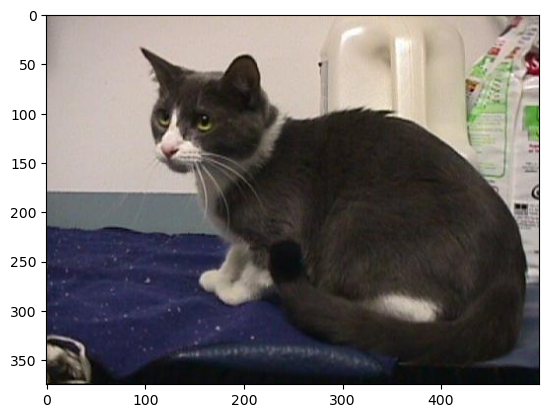

In [5]:
plt.imshow(cat4)

In [6]:
cat4.shape

(375, 500, 3)

In [7]:
dog = cv2.imread('Computer vision files/CATS_DOGS/train/DOG/2.jpg')

In [8]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

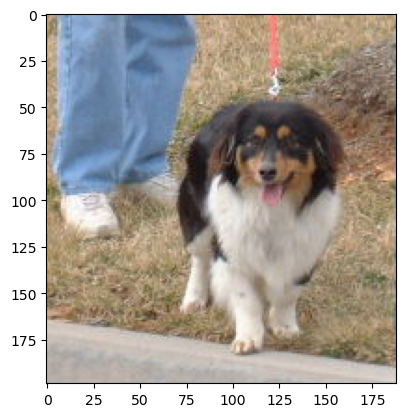

In [9]:
plt.imshow(dog)

# Preparing Data
## Image dataprocessor

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

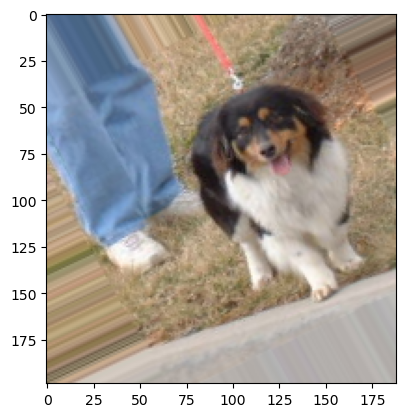

In [27]:
plt.imshow(image_gen.random_transform(dog))

## Creating the Model

In [32]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [35]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0 = cat or 1 = dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\okeiy\.conda\envs\cvcourse_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,367,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,424,065 (9.25 MB)

 Trainable params: 2,424,065 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('Computer vision files/CATS_DOGS/train',
                                                target_size=(150, 150),
                                                batch_size = batch_size,
                                                class_mode = 'binary')

Found 18743 images belonging to 2 classes.


In [38]:
test_image_gen = image_gen.flow_from_directory('Computer vision files/CATS_DOGS/test',
                                                target_size=(150, 150),
                                                batch_size = batch_size,
                                                class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [39]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [56]:
results = model.fit(train_image_gen,
                              epochs=10,steps_per_epoch=150,
                              validation_data=test_image_gen, validation_steps=12)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 51s 343ms/step - accuracy: 0.5706 - loss: 0.6773 - val_accuracy: 0.6250 - val_loss: 0.6415
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 52s 349ms/step - accuracy: 0.5849 - loss: 0.6659 - val_accuracy: 0.6302 - val_loss: 0.6714
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 52s 346ms/step - accuracy: 0.6084 - loss: 0.6678 - val_accuracy: 0.5938 - val_loss: 0.6594
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 50s 334ms/step - accuracy: 0.6072 - loss: 0.6622 - val_accuracy: 0.5833 - val_loss: 0.6696
Epoch 5/10
104/150 ━━━━━━━━━━━━━━━━━━━━ 14s 313ms/step - accuracy: 0.6347 - loss: 0.6585

C:\Users\okeiy\.conda\envs\cvcourse_env\lib\site-packages\PIL\TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


150/150 ━━━━━━━━━━━━━━━━━━━━ 51s 339ms/step - accuracy: 0.6354 - loss: 0.6564 - val_accuracy: 0.6667 - val_loss: 0.6210
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 317ms/step - accuracy: 0.6176 - loss: 0.6529 - val_accuracy: 0.6094 - val_loss: 0.6727
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 318ms/step - accuracy: 0.6246 - loss: 0.6550 - val_accuracy: 0.6510 - val_loss: 0.6285
Epoch 8/10
122/150 ━━━━━━━━━━━━━━━━━━━━ 8s 301ms/step - accuracy: 0.6789 - loss: 0.5978

C:\Users\okeiy\.conda\envs\cvcourse_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


150/150 ━━━━━━━━━━━━━━━━━━━━ 40s 266ms/step - accuracy: 0.6779 - loss: 0.5986 - val_accuracy: 0.6354 - val_loss: 0.6410
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 101s 330ms/step - accuracy: 0.6898 - loss: 0.5975 - val_accuracy: 0.7292 - val_loss: 0.5510
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 52s 346ms/step - accuracy: 0.6945 - loss: 0.5879 - val_accuracy: 0.7448 - val_loss: 0.5650


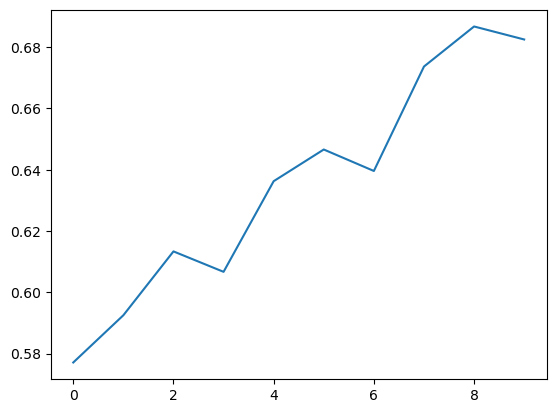

In [77]:
plt.plot(results.history['accuracy'])

In [62]:
results.history['accuracy'][-1]

0.6825000047683716

In [71]:
# new_model.save('cat_dog_100epochs_updated.keras')

In [63]:
from keras.models import load_model

In [72]:
# new_model = load_model('cat_dog_100epochs_updated.keras')

In [73]:
import numpy as np
from keras.preprocessing import image

dog_file = 'Computer vision files/CATS_DOGS/test/DOG/10005.jpg'

# Load the image from the specified path and resize it to 150x150 pixels
dog_img = image.load_img(dog_file, target_size=(150, 150))

# Convert the image from a PIL (Python Imaging Library) object to a NumPy array
dog_img = image.img_to_array(dog_img)
# At this stage, the shape of `dog_img` is (150, 150, 3), representing (height, width, RGB channels)

# Expand dimensions to match the input format expected by deep learning models
dog_img = np.expand_dims(dog_img, axis=0)
# This changes the shape from (150, 150, 3) to (1, 150, 150, 3), adding a batch dimension

# Normalize pixel values to the range [0,1] for better model performance
dog_img = dog_img / 255
# This prevents large numerical values that could slow down training or inference

In [74]:
model.predict(dog_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([[0.72186404]], dtype=float32)